<a href="https://colab.research.google.com/github/JS0501/ESAA_YB3/blob/main/YB0404(2)_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [5]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [8]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [9]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [10]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [11]:
from sklearn.preprocessing import Binarizer


In [14]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기, 1은 악성 0은 양성, 양성으로 예측할 확률이 0.1보다 크면 y_pred2에 넣
# 예측 확률
y_prob = model_lor.predict_proba(X) # X에 대한 클래스별 확률 반환
negative_class_prob = y_prob[:, 1]  # 악성 클래스에 대한 확률
y_pred2 = (negative_class_prob > 0.1).astype(int)  # 악성 확률이 0.1보다 큰 경우

# 혼동 행렬
print(confusion_matrix(y,y_pred2))

# 정확도
print(accuracy_score(y,y_pred))

# 정밀도
print(precision_score(y,y_pred2))

# 재현율
print(recall_score(y,y_pred2))

# f1 score
print(f1_score(y,y_pred))

[[267  90]
 [  6 206]]
0.9121265377855887
0.6959459459459459
0.9716981132075472
0.8792270531400966


* ROC 곡선 시각화

In [19]:
from sklearn.metrics import roc_curve, auc


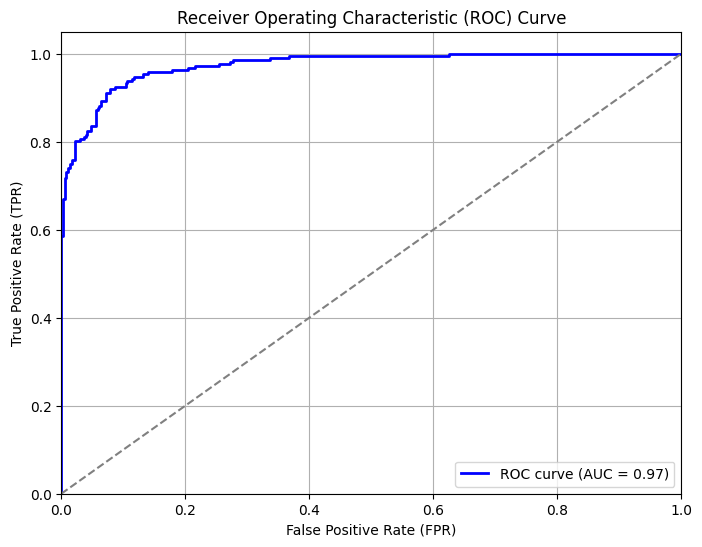

In [20]:
import matplotlib.pyplot as plt
# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y, negative_class_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 랜덤 분류기 (대각선)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* ROC AUC 값

In [23]:
# AUC 계산
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.97412927435125)

ROC (Receiver Operating Characteristic) 곡선은 이진 분류 모델의 성능을 평가하는 데 사용되는 시각화 도구입니다. ROC 곡선은 **위양성 비율 (FPR, False Positive Rate)**에 대한 **재현율 (TPR, True Positive Rate)**을 플로팅합니다.